In [53]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import joblib
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [99]:
data=pd.read_csv('dataset.csv')
data.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom 5,Symptom 6,Symptom 7,Symptom 8,Symptom 9,Symptom 10,Symptom 11,Symptom 12,Symptom 13,Symptom 14,Symptom 15,Symptom 16,Symptom 17
0,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin rash,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin rash,nodal skin eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
data=data.iloc[:,:5]
#data.dropna(inplace=True)
data.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4
0,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches
1,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,NaN
2,Fungal infection,itching,nodal skin eruptions,dischromic patches,NaN
3,Fungal infection,itching,skin rash,dischromic patches,NaN
4,Fungal infection,itching,skin rash,nodal skin eruptions,NaN


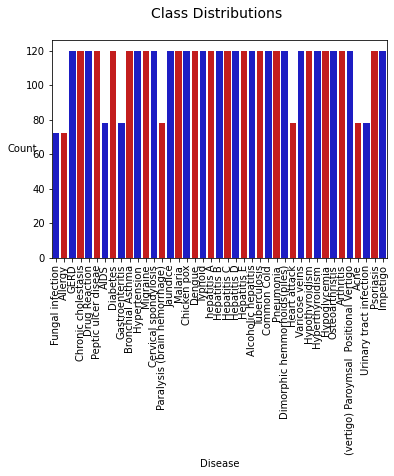

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = ["#0101DF", "#DF0101"]

sns.countplot('Disease', data=data, palette=colors)
plt.title('Class Distributions \n ', fontsize=14)

# Rotating the y-axis label
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed

# Accessing and rotating y-axis label
plt.gca().yaxis.get_label().set_rotation(0)
plt.gca().yaxis.get_label().set_verticalalignment('center')

plt.show()









In [57]:
data['Disease'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [101]:
print(len(data['Symptom_1'].unique()))
print(len(data['Symptom_2'].unique()))
print(len(data['Symptom_3'].unique()))
print(len(data['Symptom_4'].unique()))

34
48
54
51


In [102]:
data['Symptom_1'].unique()

array(['itching', 'skin rash', 'continuous sneezing', 'shivering',
       'stomach pain', 'acidity', 'vomiting', 'indigestion',
       'muscle wasting', 'patches in throat', 'fatigue', 'weight loss',
       'sunken eyes', 'cough', 'headache', 'chest pain', 'back pain',
       'weakness in limbs', 'chills', 'joint pain', 'yellowish skin',
       'constipation', 'pain during bowel movements', 'breathlessness',
       'cramps', 'weight gain', 'mood swings', 'neck pain',
       'muscle weakness', 'stiff neck', 'pus filled pimples',
       'burning micturition', 'bladder discomfort', 'high fever'],
      dtype=object)

In [103]:
data['Symptom_2'].unique()

array(['skin rash', 'nodal skin eruptions', 'shivering', 'chills',
       'acidity', 'ulcers on tongue', 'vomiting', 'yellowish skin',
       'stomach pain', 'loss of appetite', 'indigestion',
       'patches in throat', 'high fever', 'weight loss', 'restlessness',
       'sunken eyes', 'dehydration', 'cough', 'chest pain', 'dizziness',
       'headache', 'weakness in limbs', 'neck pain',
       'weakness of one body side', 'fatigue', 'joint pain', 'lethargy',
       'nausea', 'abdominal pain', 'pain during bowel movements',
       'pain in anal region', 'breathlessness', 'sweating', 'cramps',
       'bruising', 'weight gain', 'cold hands and feets', 'mood swings',
       'anxiety', 'knee pain', 'stiff neck', 'swelling joints',
       'pus filled pimples', 'blackheads', 'bladder discomfort',
       'foul smell of urine', 'skin peeling', 'blister'], dtype=object)

In [58]:
label_counts = data['Disease'].value_counts()

# Print the counts
print(label_counts)

Bronchial Asthma                           120
Osteoarthristis                            120
Hepatitis E                                120
Typhoid                                    120
Psoriasis                                  120
Hepatitis C                                120
Malaria                                    120
Hypoglycemia                               120
Arthritis                                  120
Tuberculosis                               120
Impetigo                                   120
Migraine                                   120
Hypothyroidism                             120
Jaundice                                   120
Drug Reaction                              120
hepatitis A                                120
Peptic ulcer diseae                        120
Dimorphic hemmorhoids(piles)               120
Dengue                                     120
Hepatitis B                                120
Alcoholic hepatitis                        120
Common Cold  

In [59]:
maps=dict()
def find_category_mappings(data, variable):
    return {k: i for i, k in enumerate(data[variable].unique())}
def integer_encode(data,variable, ordinal_mapping):
    data[variable] = data[variable].map(ordinal_mapping)
for variable in ['Disease','Symptom_1','Symptom_2','Symptom_3','Symptom_4']:
    #print(variable)
    mappings = find_category_mappings(data,variable)
    maps[variable]=mappings
    integer_encode(data, variable, mappings)
data.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4
0,0,0,0,0,0
9,0,0,0,0,0
10,1,1,1,1,1
19,1,1,1,1,1
20,2,2,2,2,2


In [60]:
maps

{'Disease': {'Fungal infection': 0,
  'Allergy': 1,
  'GERD': 2,
  'Chronic cholestasis': 3,
  'Drug Reaction': 4,
  'Peptic ulcer diseae': 5,
  'AIDS': 6,
  'Diabetes': 7,
  'Gastroenteritis': 8,
  'Bronchial Asthma': 9,
  'Hypertension': 10,
  'Migraine': 11,
  'Cervical spondylosis': 12,
  'Paralysis (brain hemorrhage)': 13,
  'Jaundice': 14,
  'Malaria': 15,
  'Chicken pox': 16,
  'Dengue': 17,
  'Typhoid': 18,
  'hepatitis A': 19,
  'Hepatitis B': 20,
  'Hepatitis C': 21,
  'Hepatitis D': 22,
  'Hepatitis E': 23,
  'Alcoholic hepatitis': 24,
  'Tuberculosis': 25,
  'Common Cold': 26,
  'Pneumonia': 27,
  'Dimorphic hemmorhoids(piles)': 28,
  'Heart attack': 29,
  'Varicose veins': 30,
  'Hypothyroidism': 31,
  'Hyperthyroidism': 32,
  'Hypoglycemia': 33,
  'Osteoarthristis': 34,
  'Arthritis': 35,
  '(vertigo) Paroymsal  Positional Vertigo': 36,
  'Acne': 37,
  'Urinary tract infection': 38,
  'Psoriasis': 39,
  'Impetigo': 40},
 'Symptom_1': {'itching': 0,
  'continuous sneezing'

In [61]:
data['Disease'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40], dtype=int64)

In [62]:
file=open("mappings.txt","w")
file.write(str(maps))
file.close()

In [63]:
x=data.iloc[:,1:5]
x.head()

,Symptom_1,Symptom_2,Symptom_3,Symptom_4
0,0,0,0,0
9,0,0,0,0
10,1,1,1,1
19,1,1,1,1
20,2,2,2,2


In [64]:
y=data['Disease']
y.head()

0     0
9     0
10    1
19    1
20    2
Name: Disease, dtype: int64

In [65]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [66]:
from collections import Counter


print('Original dataset shape %s' % Counter(y_train))

Original dataset shape Counter({14: 94, 36: 91, 20: 90, 5: 89, 11: 89, 18: 89, 30: 88, 39: 87, 27: 87, 9: 87, 31: 86, 2: 86, 19: 85, 23: 85, 12: 85, 7: 84, 24: 84, 17: 84, 4: 83, 33: 83, 10: 82, 40: 82, 3: 81, 15: 81, 34: 80, 28: 80, 16: 80, 25: 77, 32: 77, 35: 75, 21: 75, 26: 74, 22: 74, 29: 63, 38: 59, 13: 59, 8: 58, 1: 55, 6: 53, 37: 52, 0: 47})


In [67]:
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))



After OverSampling, the shape of train_X: (3854, 4)
After OverSampling, the shape of train_y: (3854,) 



In [68]:
print('resampled dataset shape %s' % Counter(y_train_res))

resampled dataset shape Counter({3: 94, 39: 94, 5: 94, 10: 94, 37: 94, 19: 94, 14: 94, 0: 94, 7: 94, 40: 94, 38: 94, 34: 94, 23: 94, 6: 94, 26: 94, 28: 94, 24: 94, 17: 94, 22: 94, 11: 94, 15: 94, 31: 94, 25: 94, 36: 94, 4: 94, 18: 94, 32: 94, 20: 94, 12: 94, 2: 94, 16: 94, 27: 94, 30: 94, 1: 94, 9: 94, 29: 94, 35: 94, 33: 94, 13: 94, 21: 94, 8: 94})


In [69]:
clf_rf=RandomForestClassifier(random_state=0)

In [70]:
clf_rf.fit(X_train_res,y_train_res)

RandomForestClassifier(random_state=0)

In [71]:
y_pred=clf_rf.predict(X_test)

In [72]:
acc_rf=accuracy_score(y_pred,y_test)
cm_rf=confusion_matrix(y_pred,y_test)
cr_rf=classification_report(y_pred,y_test)

In [73]:
print(acc_rf)
print(cm_rf)
print(cr_rf)

0.9978134110787172
[[25  0  0 ...  0  0  0]
 [ 0 17  0 ...  0  0  0]
 [ 0  0 34 ...  0  0  0]
 ...
 [ 0  0  0 ... 19  0  0]
 [ 0  0  0 ...  0 33  0]
 [ 0  0  0 ...  0  0 38]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        39
           4       1.00      1.00      1.00        37
           5       1.00      1.00      1.00        31
           6       1.00      1.00      1.00        25
           7       1.00      1.00      1.00        36
           8       1.00      1.00      1.00        20
           9       1.00      1.00      1.00        33
          10       1.00      1.00      1.00        38
          11       1.00      1.00      1.00        31
          12       1.00      1.00      1.00        35
          13       1.00      1.00      1.00        19
          14  

In [74]:
joblib.dump(clf_rf,'model_rf.joblib')

['model_rf.joblib']

In [75]:
classifier_svm=SVC(probability=True)
classifier_svm.fit(X_train_res,y_train_res)

SVC(probability=True)

In [76]:
y_pred_svm=classifier_svm.predict(X_test)

In [77]:
acc_svm=accuracy_score(y_pred_svm,y_test)
cm_svm=confusion_matrix(y_pred_svm,y_test)
cr_svm=classification_report(y_pred_svm,y_test)

In [78]:
print(acc_svm)
print(cm_svm)
print(cr_svm)

0.89067055393586
[[25  0  0 ...  0  0  0]
 [ 0 17  0 ...  0  0  0]
 [ 0  0 34 ...  0  0  0]
 ...
 [ 0  0  0 ... 19  0  1]
 [ 0  0  0 ...  0 33  0]
 [ 0  0  0 ...  0  0 37]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        34
           3       1.00      0.95      0.97        41
           4       0.86      1.00      0.93        32
           5       1.00      0.91      0.95        34
           6       1.00      1.00      1.00        25
           7       1.00      1.00      1.00        36
           8       1.00      1.00      1.00        20
           9       0.94      1.00      0.97        31
          10       1.00      0.95      0.97        40
          11       0.94      1.00      0.97        29
          12       1.00      0.90      0.95        39
          13       1.00      0.73      0.84        26
          14    

In [79]:
from sklearn.neighbors import KNeighborsClassifier

In [80]:
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train_res,y_train_res)

KNeighborsClassifier()

In [81]:
knn_pred=knn_clf.predict(X_test)
knn_pred

array([16, 18, 27, ..., 17,  7, 16], dtype=int64)

In [82]:
print("Accuracy Score:",accuracy_score(y_test,knn_pred)*100)

Accuracy Score: 99.19825072886297


In [83]:
acc_knn=accuracy_score(y_test,knn_pred)

In [84]:
print("Confusion Matrix:\n",confusion_matrix(y_test,knn_pred))

Confusion Matrix:
 [[25  0  0 ...  0  0  0]
 [ 0 17  0 ...  0  0  0]
 [ 0  0 34 ...  0  0  0]
 ...
 [ 0  0  0 ... 19  0  0]
 [ 0  0  0 ...  0 33  0]
 [ 0  0  0 ...  0  0 38]]


In [85]:
print("Classification Report:\n",classification_report(y_test,knn_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        39
           4       1.00      1.00      1.00        37
           5       1.00      1.00      1.00        31
           6       1.00      1.00      1.00        25
           7       1.00      1.00      1.00        36
           8       1.00      1.00      1.00        20
           9       1.00      1.00      1.00        33
          10       1.00      1.00      1.00        38
          11       1.00      1.00      1.00        31
          12       1.00      1.00      1.00        35
          13       1.00      1.00      1.00        19
          14       1.00      0.85      0.92        26
          15       1.00      1.00      1.00        39
          16       1.00      1.00      1.00        40
   

In [86]:
#plotting accuracy graph
x=['svm','rf','knn']
y=[acc_svm,acc_rf,acc_knn]
c=['red','green','blue']

In [87]:
plt.bar(x,y,color=c)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Score')
plt.title('Comparison Graph')
#plt.show()
plt.savefig('acc_graph.png')
plt.close()